In [1]:
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import numpy as np

# Error configuration
error_tolerance = 5
e_max, e_min = 160, -160
e_range = np.arange(e_min, e_max, 0.1)

# Delta Error (Rate of Change) configuration
delta_error_tolerance = 2
de_max, de_min = 10, -10
de_range = np.arange(de_min, de_max, 0.1)

# Variables Definition
error = ctrl.Antecedent(e_range, 'error')
delta_error = ctrl.Antecedent(de_range, 'delta_error')
acceleration = ctrl.Consequent(np.arange(0, 100, 0.1), 'acceleration')

c:\Users\batut\miniconda3\envs\a209\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


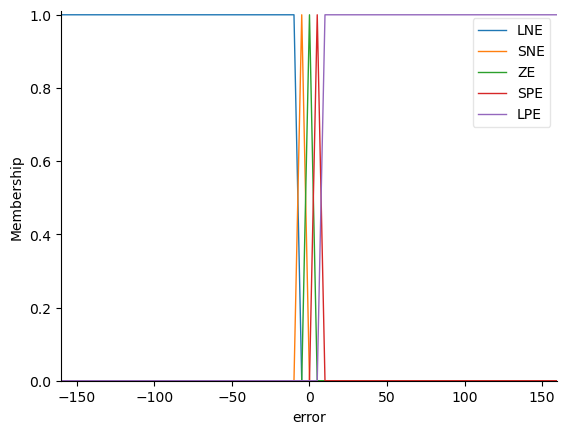

In [2]:
# Error membership functions

# LNE: Large Negative Error | SNE: Small Negative Error
# ZE: Zero Error | SPE: Small Positive Error | LPE: Large Positive Error

error['LNE'] = fuzz.trapmf(error.universe, [e_min, e_min, -2 * error_tolerance, -error_tolerance])
error['SNE'] = fuzz.trimf(error.universe, [-2 * error_tolerance, -error_tolerance, 0])
error['ZE']  = fuzz.trimf(error.universe, [-error_tolerance, 0, error_tolerance])
error['SPE'] = fuzz.trimf(error.universe, [0, error_tolerance, 2 * error_tolerance])
error['LPE'] = fuzz.trapmf(error.universe, [error_tolerance, 2 * error_tolerance, e_max, e_max])

error.view()

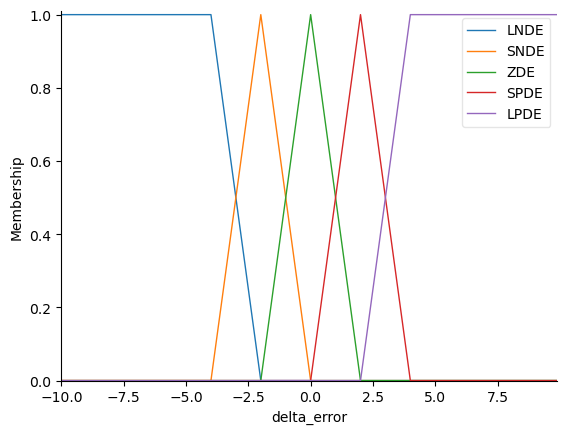

In [3]:
# Delta Error membership functions (Rate of Change)

# LNDE: Large Negative Delta Error | SNDE: Small Negative Delta Error
# ZDE: Zero Delta Error | SPDE: Small Positive Delta Error | LPDE: Large Positive Delta Error

delta_error['LNDE'] = fuzz.trapmf(delta_error.universe, [de_min, de_min, -2 * delta_error_tolerance, -delta_error_tolerance])
delta_error['SNDE'] = fuzz.trimf(delta_error.universe, [-2 * delta_error_tolerance, -delta_error_tolerance, 0])
delta_error['ZDE']  = fuzz.trimf(delta_error.universe, [-delta_error_tolerance, 0, delta_error_tolerance])
delta_error['SPDE'] = fuzz.trimf(delta_error.universe, [0, delta_error_tolerance, 2 * delta_error_tolerance])
delta_error['LPDE'] = fuzz.trapmf(delta_error.universe, [delta_error_tolerance, 2 * delta_error_tolerance, de_max, de_max])

delta_error.view()

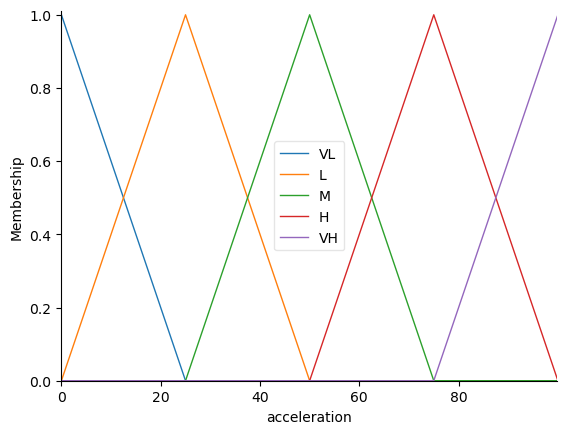

In [4]:
# Output membership functions (Acceleration)

# VL: Very Low | L: Low | M: Medium | H: High | VH: Very High

acceleration['VL'] = fuzz.trimf(acceleration.universe, [0, 0, 25])
acceleration['L']  = fuzz.trimf(acceleration.universe, [0, 25, 50])
acceleration['M']  = fuzz.trimf(acceleration.universe, [25, 50, 75])
acceleration['H']  = fuzz.trimf(acceleration.universe, [50, 75, 100])
acceleration['VH'] = fuzz.trimf(acceleration.universe, [75, 100, 100])

acceleration.view()

In [5]:
# Rule Base

rules_list = []

# Tuning list (Mapping inputs to acceleration levels)
tuning = ['VH', 'H', 'H', 'M', 'L',
          'VH', 'M', 'M', 'M', 'L',
          'VH', 'H', 'M', 'L', 'VL',
          'VH', 'H', 'L', 'L', 'VL',
          'H',  'M', 'L', 'L', 'VL']

counter = 0

for de_term in delta_error.terms:
  for e_term in error.terms:
    rules_list.append(ctrl.Rule(delta_error[de_term] & error[e_term], acceleration[tuning[counter]]))
    counter += 1

In [6]:
# Create the Control System and Simulation Engine
control_system = ctrl.ControlSystem(rules_list)
controller = ctrl.ControlSystemSimulation(control_system)

# Test Inputs
errors = [-30, 2, -7.5]
delta_errors = [-1.2, 1.4, -3.5]

# Inference Loop
for e_val, de_val in zip(errors, delta_errors):
    controller.input['error'] = e_val
    controller.input['delta_error'] = de_val
    
    # Perform the fuzzy computation
    controller.compute()

    # Get the defuzzified output (Acceleration)
    accel_out = controller.output['acceleration']
    print(f"Error: {e_val:>5} | Delta Error: {de_val:>5} -> Acceleration: {accel_out:.2f}%")

Error:   -30 | Delta Error:  -1.2 -> Acceleration: 90.66%
Error:     2 | Delta Error:   1.4 -> Acceleration: 33.88%
Error:  -7.5 | Delta Error:  -3.5 -> Acceleration: 69.62%
